In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/candidate_summary_with_labels.csv')
amt_rank = pd.read_csv('data/amount_rank.csv')
amt_rank = amt_rank.drop(['Unnamed: 0'], axis=1)
#left join df and amt_rank
df = df.merge(amt_rank, left_on=['RecipID', 'Cycle'], how='left', right_on=['CID', 'CycleCands'])
#df.to_csv('data/all_features_candidate_summary_with_labels.csv')


In [49]:
df.columns

Index(['Cycle', 'RecipID', 'TotalGiftAmt', 'TotalGiftAvg', 'TotalGiftCount',
       'TotalGiftAvg.1', 'DonorCount', 'MultiCycleDonorCount',
       'RepeatDonorCount', 'MaleDonorCount', 'FemaleDonorCount',
       'CycleCands_x', 'FECCandID', 'CID_x', 'FirstLastP', 'Party',
       'DistIDRunFor', 'DistIDCurr', 'CurrCand', 'CycleCand', 'CRPICO',
       'RecipCodeCands', 'NoPacs', 'curr_cand', 'incumbent', 'challenger',
       'open_office', 'nopacs', 'republican', 'democrat', 'other_party',
       'cand_party', 'cand_status', 'run_for_state', 'run_for_district',
       'presidential_year', 'label', 'CID_y', 'CycleCands_y', 'AmountRank',
       'AmountRankSimple'],
      dtype='object')

In [50]:
#create categories for TotalGiftAmt
df['10M_amt'] = np.where(df['TotalGiftAmt'] >= 10000000, 1, 0)
df['1M_to_10M_amt'] = np.where((df['TotalGiftAmt'] >= 1000000) & (df['TotalGiftAmt'] < 10000000), 1, 0)
df['100K_to_1M_amt'] = np.where((df['TotalGiftAmt'] >= 100000) & (df['TotalGiftAmt'] < 1000000), 1, 0)
df['10K_to_100K_amt'] = np.where((df['TotalGiftAmt'] >= 10000) & (df['TotalGiftAmt'] < 100000), 1, 0)
df['1K_to_10K_amt'] = np.where((df['TotalGiftAmt'] >= 1000) & (df['TotalGiftAmt'] < 10000), 1, 0)
df['100_to_1K_amt'] = np.where((df['TotalGiftAmt'] >= 100) & (df['TotalGiftAmt'] < 1000), 1, 0)
df['10_to_100_amt'] = np.where((df['TotalGiftAmt'] >= 10) & (df['TotalGiftAmt'] < 100), 1, 0)
df['1_to_10_amt'] = np.where((df['TotalGiftAmt'] >= 1) & (df['TotalGiftAmt'] < 10), 1, 0)
df['0_to_1_amt'] = np.where((df['TotalGiftAmt'] < 1), 1, 0)

### 1. Preliminary EDA and pre-processing 

---

In [51]:
#senate seats
df['senate_seat'] = df['DistIDRunFor'].str[2] == 'S'
df['senate_seat'] = df['senate_seat'].astype(int)

#presidential seats
df['presidential_seat'] = df['DistIDRunFor'].str[0] == 'P'
df['presidential_seat'] = df['presidential_seat'].astype(int)

#house seats 1 if senate seat is 0 and presidential seat is 0
df['house_seat'] = (df['senate_seat'] == 0) & (df['presidential_seat'] == 0)
df['house_seat'] = df['house_seat'].astype(int)

df_senate = df[df['senate_seat'] == 1].copy()
df_presidential = df[df['presidential_seat'] == 1].copy()
df_house = df[df['house_seat'] == 1].copy()

In [52]:
df_presidential.head()

,Cycle,RecipID,TotalGiftAmt,TotalGiftAvg,TotalGiftCount,TotalGiftAvg.1,DonorCount,MultiCycleDonorCount,RepeatDonorCount,MaleDonorCount,...,100K_to_1M_amt,10K_to_100K_amt,1K_to_10K_amt,100_to_1K_amt,10_to_100_amt,1_to_10_amt,0_to_1_amt,senate_seat,presidential_seat,house_seat
51,2010,N00001373,214593,945.343612,289,1.273128,227,101,113,174,...,1,0,0,0,0,0,0,0,1,0
52,2010,N00001408,450550,1093.567961,597,1.449029,412,1,102,333,...,1,0,0,0,0,0,0,0,1,0
53,2010,N00001469,399503,839.292017,647,1.359244,476,129,191,371,...,1,0,0,0,0,0,0,0,1,0
54,2010,N00001489,11059549,1216.939811,14446,1.589569,9088,2489,4073,7053,...,0,0,0,0,0,0,0,1,1,0
55,2010,N00001509,753677,1279.587436,869,1.475382,589,0,221,460,...,1,0,0,0,0,0,0,0,1,0


In [53]:
df_senate.head()

,Cycle,RecipID,TotalGiftAmt,TotalGiftAvg,TotalGiftCount,TotalGiftAvg.1,DonorCount,MultiCycleDonorCount,RepeatDonorCount,MaleDonorCount,...,100K_to_1M_amt,10K_to_100K_amt,1K_to_10K_amt,100_to_1K_amt,10_to_100_amt,1_to_10_amt,0_to_1_amt,senate_seat,presidential_seat,house_seat
1,2010,N00000036,5570090,788.517837,12854,1.819649,7064,2205,3656,3960,...,0,0,0,0,0,0,0,1,0,0
14,2010,N00000387,466793,976.554393,673,1.407950,478,20,128,353,...,1,0,0,0,0,0,0,1,0,0
18,2010,N00000581,2671600,1069.923909,3974,1.591510,2497,1,711,1801,...,0,0,0,0,0,0,0,1,0,0
37,2010,N00001025,1607236,2238.490251,892,1.242340,718,0,126,435,...,0,0,0,0,0,0,0,1,0,0
40,2010,N00001093,13377007,2042.602993,8719,1.331348,6549,1533,2767,4801,...,0,0,0,0,0,0,0,1,0,0


In [54]:
def pre_process(df):   
    
    df = pd.get_dummies(df, columns=['run_for_state','run_for_district','cand_party'])
    #split x and y
    y = df['label']
    x = df.drop(['label'], axis=1)

    #remove collinear and redundant features as they can skew our Beta coefficients variables
    x = x.drop(['curr_cand','RepeatDonorCount','CycleCands_y','challenger','FemaleDonorCount','TotalGiftAvg.1','open_office'], axis=1)

    #drop non numeric columns in x
    x = x.select_dtypes(include=['float64','int64','uint8','int32'])
      
    return x, y

In [55]:
#correlation of features with target and arrange highest to low
def plot_correlation(x,y):
    correlation = x.corrwith(y)
    correlation = correlation.sort_values(ascending=False)

    #plot bar

    plt.figure(figsize=(20,20))
    plt.barh(correlation.index, correlation.values)
    #title
    plt.title('Correlation of Features with Target')
    #x label
    plt.xlabel('Correlation')
    plt.show()

def label_distribution(y):
    #plot bar
    plt.figure(figsize=(10,10))
    plt.bar(y.value_counts().index, y.value_counts().values)   
    plt.title('Distribution of Labels')
    #include values on top of bars
    for i, v in enumerate(y.value_counts().values):
        plt.text(i, v, str(v), color='black', fontweight='bold')    
    plt.xlabel('Label')
    plt.show()

### 2. Anaysis on senate seats

--- 

In [56]:
x,y = pre_process(df_senate)
#test train split with validation

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


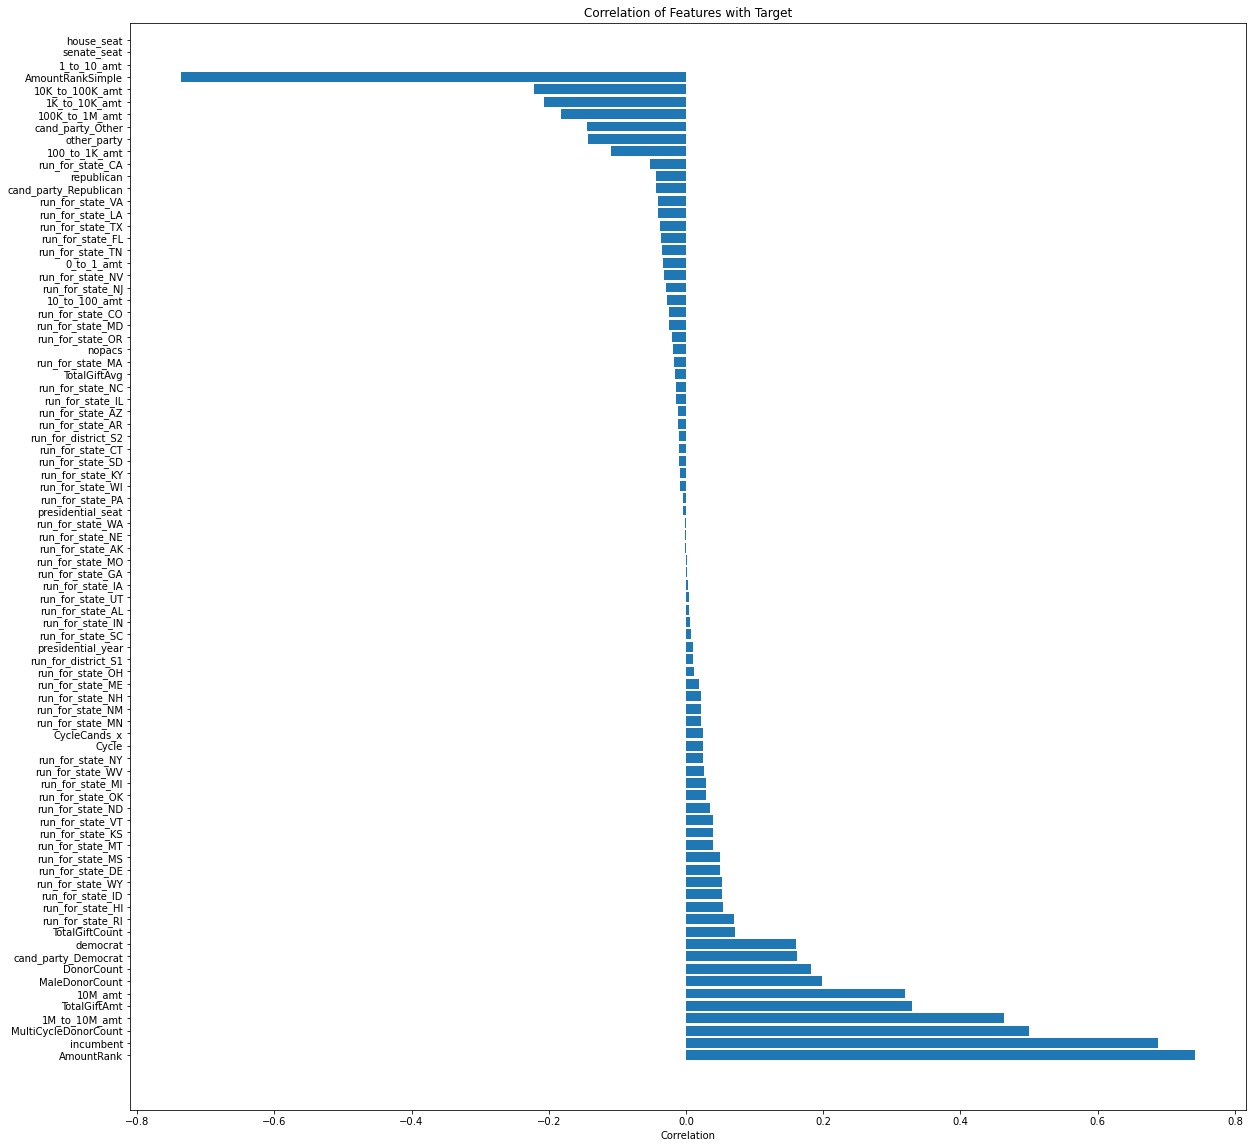

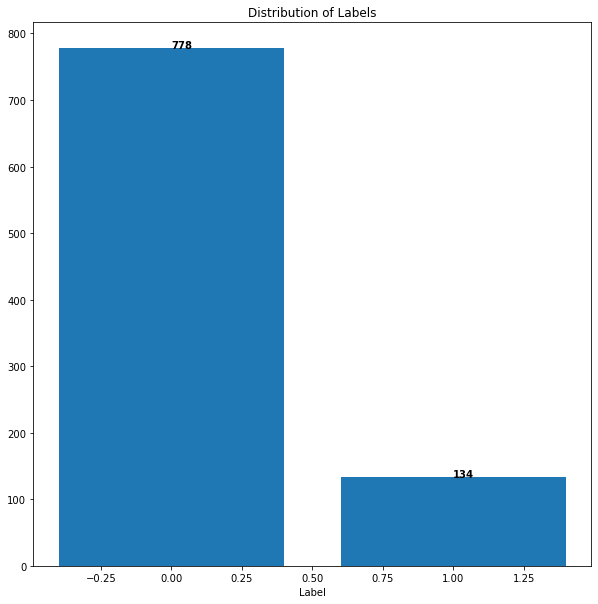

In [57]:
#correlation plot 
plot_correlation(x_train,y_train)
#label distribution
label_distribution(y_train)

### Grid search for best parameters with dummy variables for senate seats
--- 

In [58]:
#logistic regression and pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


def grid_search(x_train, y_train, cv=5):

    logreg = LogisticRegression(max_iter=1000, tol=.001)

    std_scaler = StandardScaler()
    pipeline = make_pipeline(std_scaler, logreg)

    params = {}
    params['logisticregression__C'] = [0.01, 0.1, 1, 10, 100, 1000]
    params['logisticregression__class_weight'] = ['balanced', None]
    params['logisticregression__penalty'] = ['l1', 'l2']
    params['logisticregression__solver'] = [ 'saga', 'lbfgs']
    

    grid = GridSearchCV(pipeline, param_grid=params, cv=cv, scoring='accuracy')
    grid.fit(x_train, y_train)
    print('best score: ', grid.best_score_)
    print('best params: ', grid.best_params_)
    
    return grid

In [59]:
def fit_using_best_params(x_train, y_train, grid_search = None):
    #if grid_search is not none, use best params from grid search

    if grid_search is not None:
        best_c = grid_search.best_params_['logisticregression__C']
        best_class_weight = grid_search.best_params_['logisticregression__class_weight']
        best_penalty = grid_search.best_params_['logisticregression__penalty']
        best_solver = grid_search.best_params_['logisticregression__solver']
        
    
    pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, C=best_c, class_weight=best_class_weight, penalty=best_penalty, solver=best_solver, tol=.001))
    pipeline.fit(x_train, y_train)  
 
    return pipeline


In [60]:
def get_feature_importance(pipeline, x_val):
    ''' Function to plot feature importance after logistic regression '''
    #predict on x_val
    #get feature importance from the pipeline
    feature_importance = pipeline.steps[1][1].coef_[0]
    #get feature names
    feature_names = x_val.columns
    #create a dataframe
    feature_importance_df = pd.DataFrame({'feature':feature_names, 'importance':feature_importance})
    #sort by importance
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    #plot
    plt.figure(figsize=(20,20))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.show()  
    return feature_importance



In [61]:
def print_classification_report(pipeline, x_val, y_val):
    #predict
    y_pred = pipeline.predict(x_val)

    #print classification report
    print('Classification Report')
    print(classification_report(y_val, y_pred))

  
    print('Precision Score: ', precision_score(y_val, y_pred))   
    print('Recall Score: ', recall_score(y_val, y_pred))   
    print('F1 Score: ', f1_score(y_val, y_pred))   
    print('Accuracy Score: ', accuracy_score(y_val, y_pred))

    #plot confusion matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Perform grid search for best parameters using train dataset

In [62]:
#perform grid search on best parameters using training dataset
grid = grid_search(x_train, y_train)

best score:  0.9451570287635862
best params:  {'logisticregression__C': 0.1, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}


### Fit using best parameters from the grid search

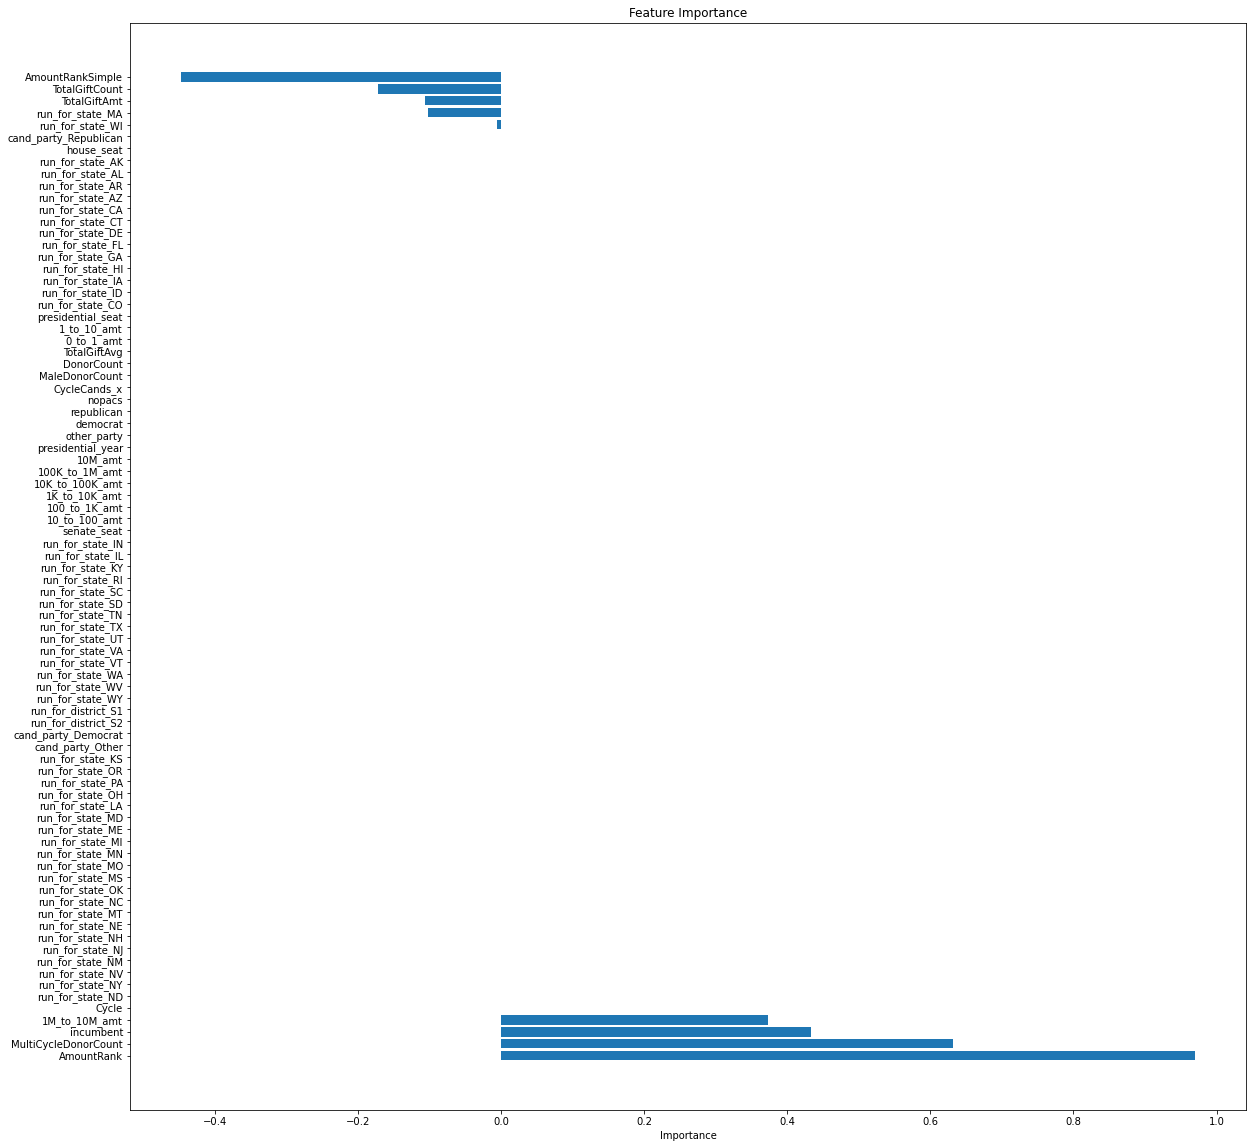

In [63]:
#fit using best params
logreg = fit_using_best_params(x_train, y_train, grid_search = grid)

#output feature importance
feature_importance = get_feature_importance(logreg, x_test)

### Performance on test set

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       188
           1       0.94      0.73      0.82        41

    accuracy                           0.94       229
   macro avg       0.94      0.86      0.89       229
weighted avg       0.94      0.94      0.94       229

Precision Score:  0.9375
Recall Score:  0.7317073170731707
F1 Score:  0.821917808219178
Accuracy Score:  0.9432314410480349


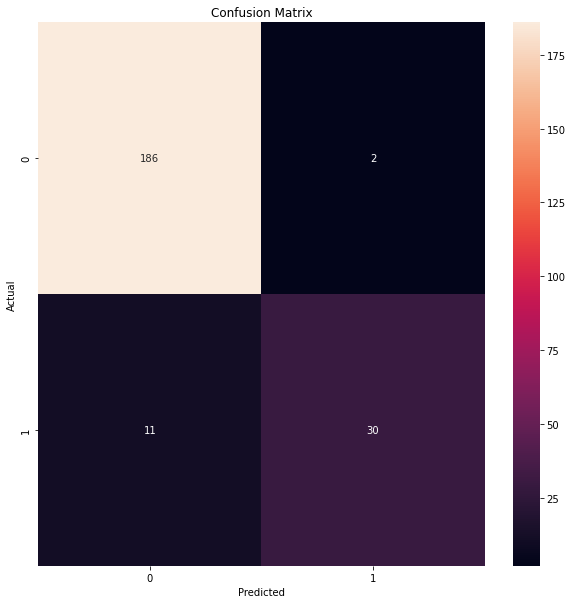

In [64]:
print_classification_report(logreg,x_test,y_test)

---

### 3. Analysis on house seats

In [65]:
x,y = pre_process(df_house)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Grid search for best parameters

In [66]:
grid = grid_search(x_train, y_train)

best score:  0.946583850931677
best params:  {'logisticregression__C': 0.01, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}


### Use best parameters to fit the model

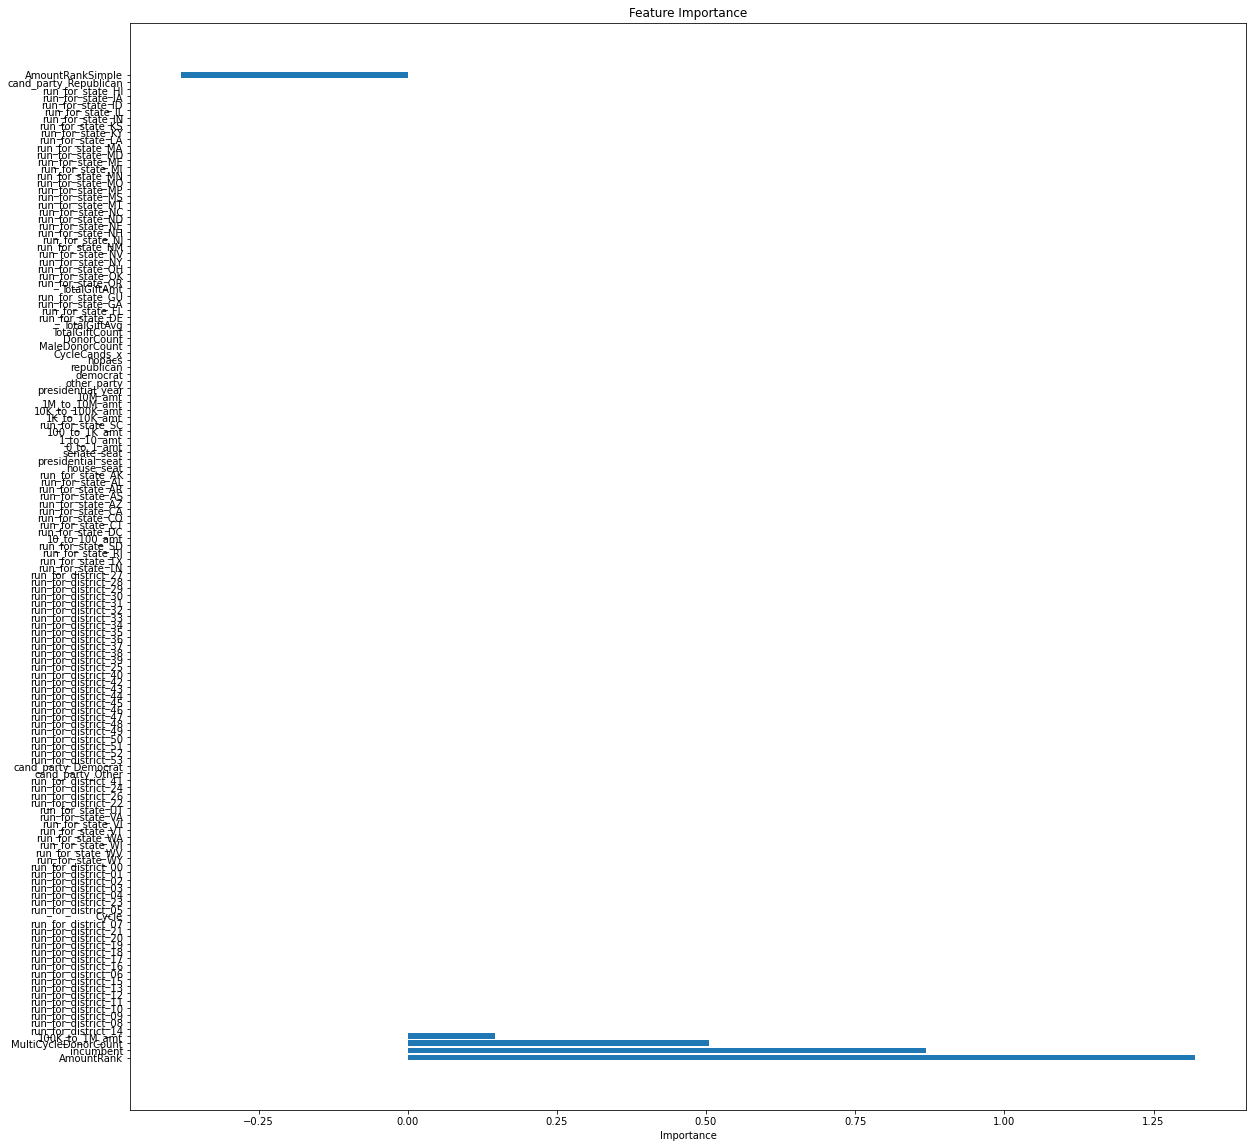

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1200
           1       0.91      0.93      0.92       410

    accuracy                           0.96      1610
   macro avg       0.94      0.95      0.95      1610
weighted avg       0.96      0.96      0.96      1610

Precision Score:  0.9093078758949881
Recall Score:  0.9292682926829269
F1 Score:  0.9191797346200241
Accuracy Score:  0.9583850931677018


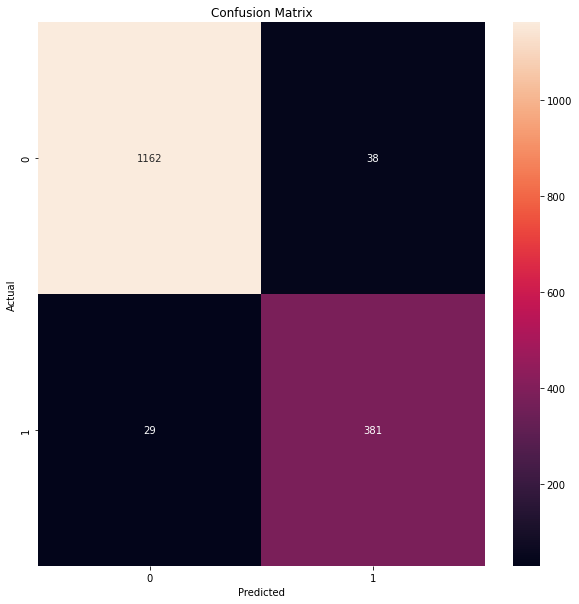

In [67]:
logreg = fit_using_best_params(x_train, y_train, grid_search = grid)

feature_importance = get_feature_importance(logreg, x_test)

print_classification_report(logreg,x_test,y_test)

### 4. Analysis on presidential election

In [68]:
x, y = pre_process(df_presidential)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
grid = grid_search(x_train, y_train)

best score:  0.9306832298136646
best params:  {'logisticregression__C': 0.01, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}


### fit best features on test dataset

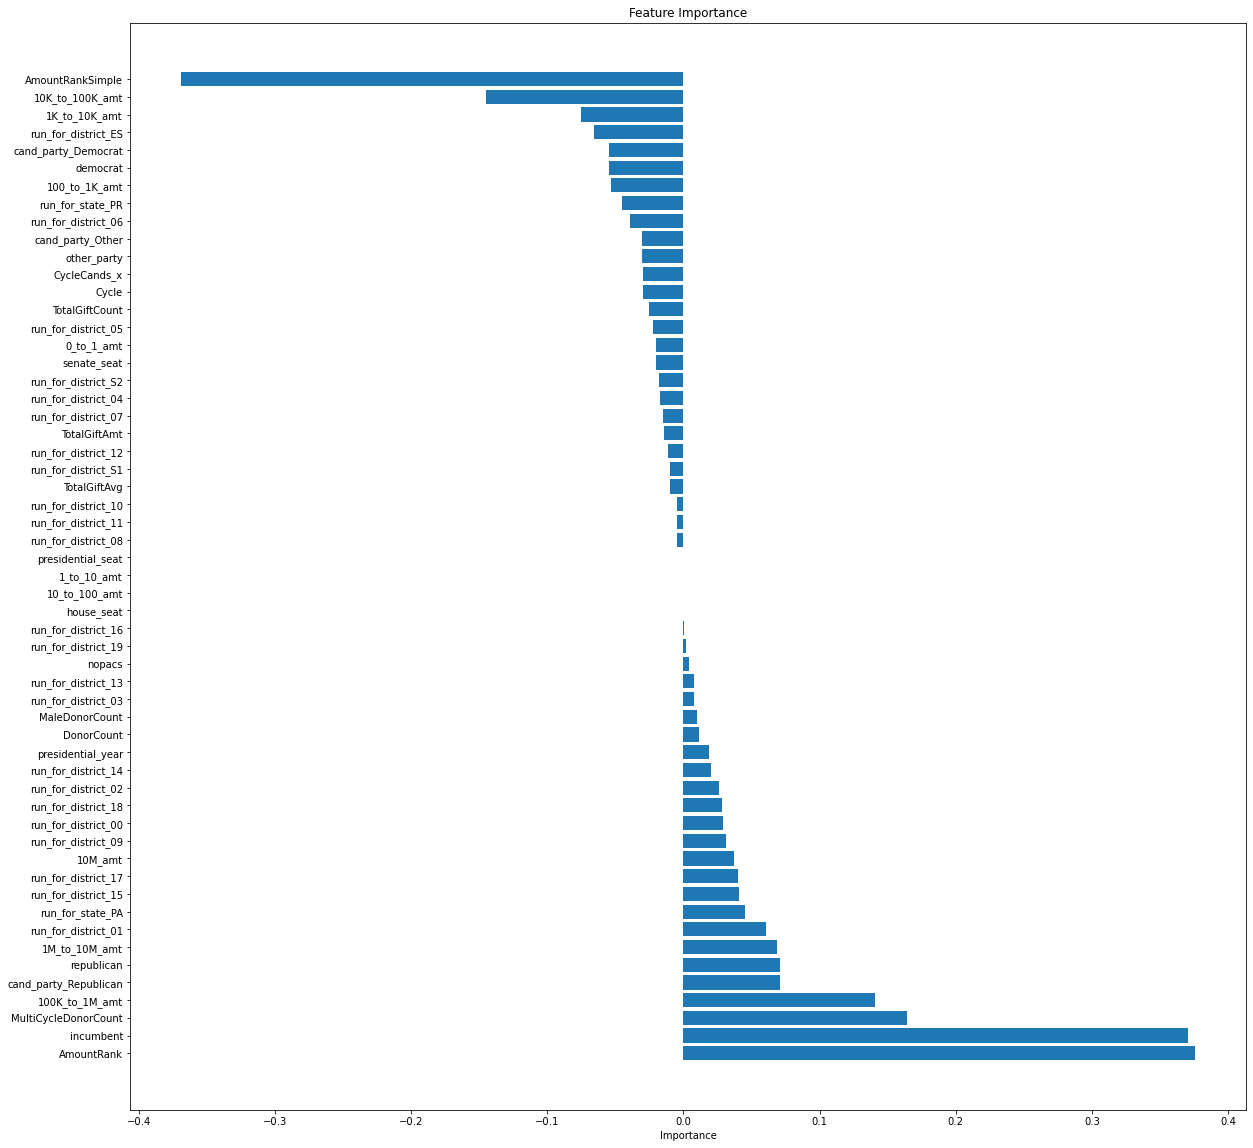

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        67
           1       0.85      0.55      0.67        20

    accuracy                           0.87        87
   macro avg       0.86      0.76      0.79        87
weighted avg       0.87      0.87      0.86        87

Precision Score:  0.8461538461538461
Recall Score:  0.55
F1 Score:  0.6666666666666667
Accuracy Score:  0.8735632183908046


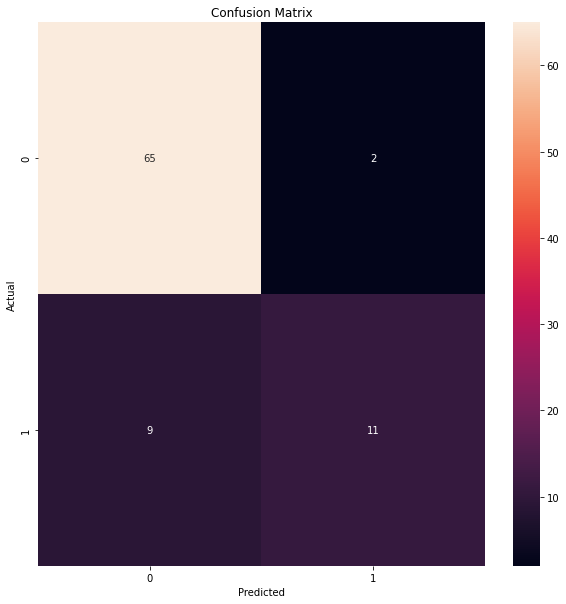

In [70]:
logreg = fit_using_best_params(x_train, y_train, grid_search = grid)

feature_importance = get_feature_importance(logreg, x_test)

print_classification_report(logreg,x_test,y_test)

### Analysis on all seats (house, senate, presidential)

In [71]:
x, y = pre_process(df)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
grid = grid_search(x_train, y_train)

best score:  0.9378341097978927
best params:  {'logisticregression__C': 1, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}


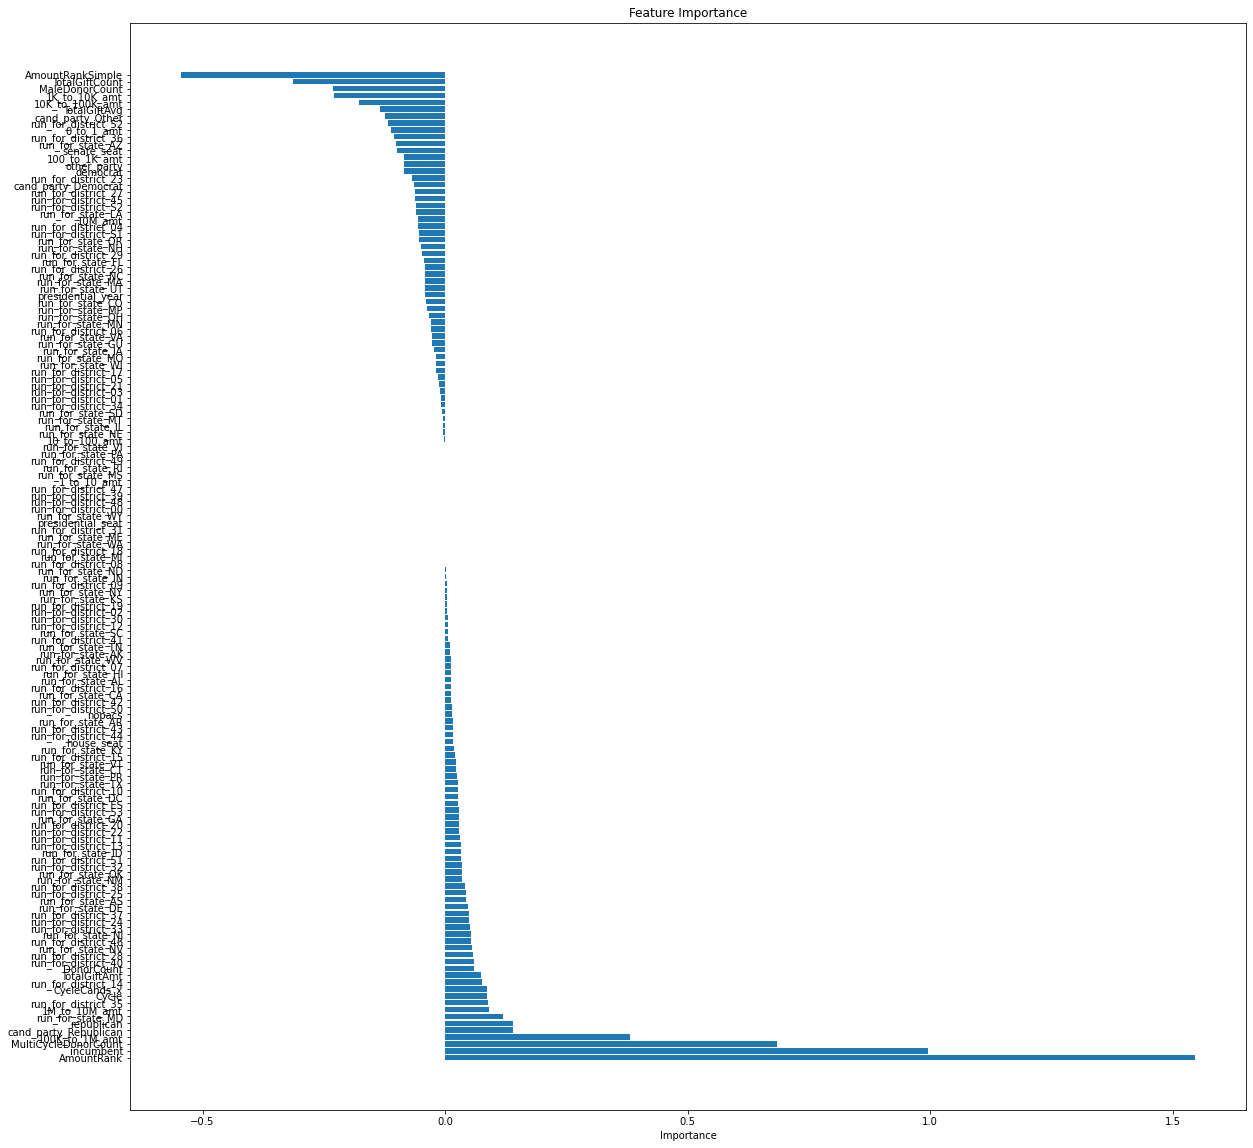

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1442
           1       0.89      0.87      0.88       477

    accuracy                           0.94      1919
   macro avg       0.92      0.92      0.92      1919
weighted avg       0.94      0.94      0.94      1919

Precision Score:  0.8872340425531915
Recall Score:  0.8742138364779874
F1 Score:  0.880675818373812
Accuracy Score:  0.9411151641479938


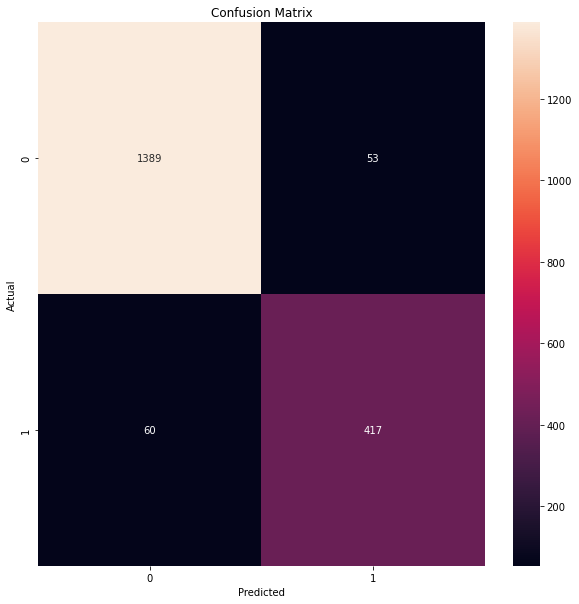

In [73]:
logreg = fit_using_best_params(x_train, y_train, grid_search = grid)

feature_importance = get_feature_importance(logreg, x_test)

print_classification_report(logreg,x_test,y_test)